In [11]:
from matplotlib import pyplot as plt
from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from os import walk
import numpy as np
import time

In [12]:
path = "../data/arff/"

list_dataset = []
for (dirpath, dirnames, filenames) in walk(path):
    list_dataset.extend(filenames)
    break
    
list_dataset.sort()

----------Clustering agglomératif----------

-----Nombre de clusters indiqué-----

---bruite_convexe.arff---
k = 2
linkage = single
Temps de calcul : 0.002744061000001352
Indice de Davies-Bouldin
0.5564016388206768
Coefficient de silhouette
0.4843303261448591


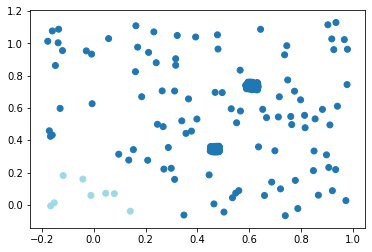




linkage = average
Temps de calcul : 0.0029016830000045957
Indice de Davies-Bouldin
0.7681938515619305
Coefficient de silhouette
0.49328753602785436


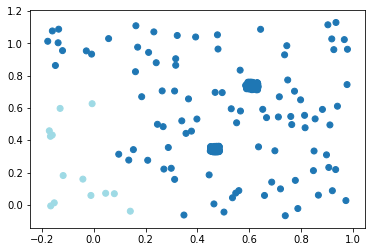




linkage = complete
Temps de calcul : 0.002628327000003594
Indice de Davies-Bouldin
0.6994540351379255
Coefficient de silhouette
0.5673612475963945


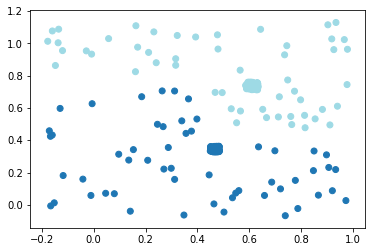




linkage = ward
Temps de calcul : 0.003214059000001157
Indice de Davies-Bouldin
0.70872268793218
Coefficient de silhouette
0.5573535228050098


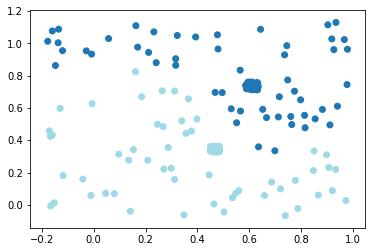




---carre.arff---
k = 9
linkage = single
Temps de calcul : 0.04129795200000075
Indice de Davies-Bouldin
0.9671115116873137
Coefficient de silhouette
-0.08169359083576029


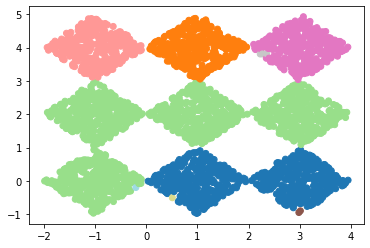




linkage = average
Temps de calcul : 0.10590846499999884
Indice de Davies-Bouldin
0.5541197660738013
Coefficient de silhouette
0.5481688245465259


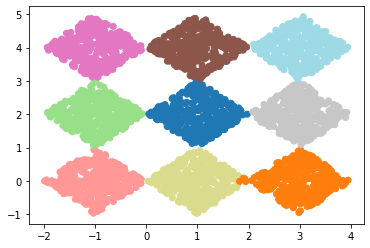




linkage = complete
Temps de calcul : 0.10483625499999505
Indice de Davies-Bouldin
0.552997094994944
Coefficient de silhouette
0.548678995573904


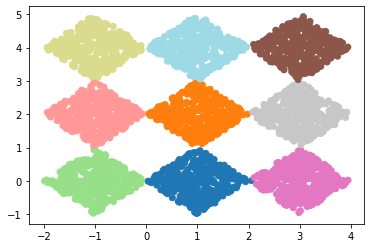




linkage = ward
Temps de calcul : 0.17694594200000324
Indice de Davies-Bouldin
0.5543846408299329
Coefficient de silhouette
0.5479013817001807


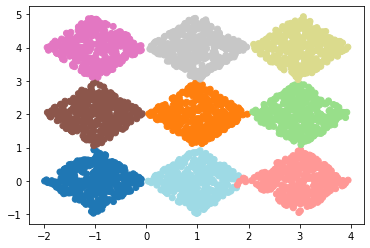




---convexe_bien_separe.arff---
k = 20
linkage = single
Temps de calcul : 0.005910356000001116
Indice de Davies-Bouldin
0.3235579871203071
Coefficient de silhouette
0.7489964116708273


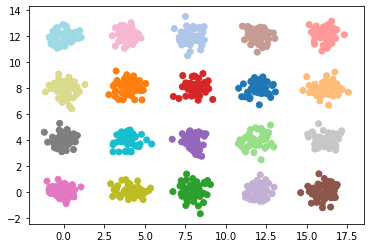




linkage = average
Temps de calcul : 0.013539882999999975
Indice de Davies-Bouldin
0.32355798712030714
Coefficient de silhouette
0.7489964116708273


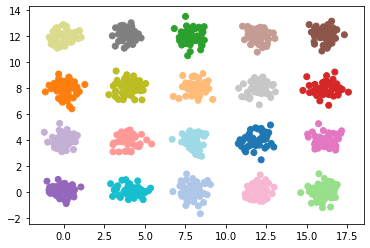




linkage = complete
Temps de calcul : 0.012977927999997974
Indice de Davies-Bouldin
0.32370207649182203
Coefficient de silhouette
0.7481682153149001


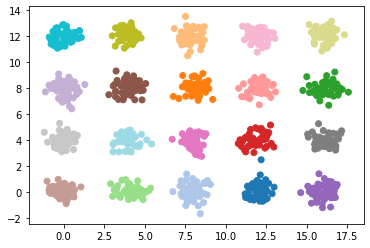




linkage = ward
Temps de calcul : 0.0192649540000005
Indice de Davies-Bouldin
0.3235579871203071
Coefficient de silhouette
0.7489964116708273


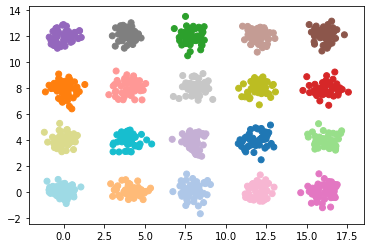




---convexe_mal_separe.arff---
k = 30
linkage = single
Temps de calcul : 0.05302476499999642
Indice de Davies-Bouldin
1.209671002015401
Coefficient de silhouette
-0.38067874639064714


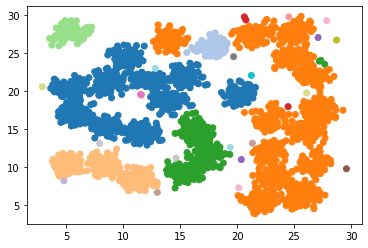




linkage = average
Temps de calcul : 0.1421500069999979
Indice de Davies-Bouldin
0.5672998946200345
Coefficient de silhouette
0.5550144030985833


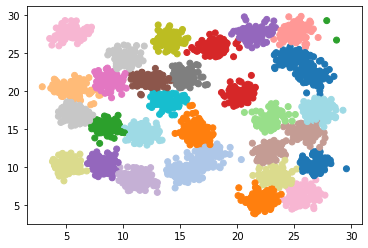




linkage = complete
Temps de calcul : 0.14299137300000098
Indice de Davies-Bouldin
0.5588565838365422
Coefficient de silhouette
0.5583384827078943


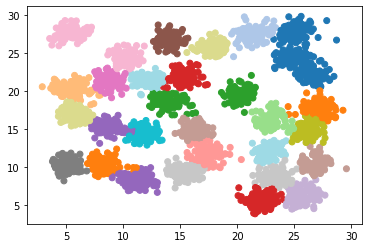




linkage = ward
Temps de calcul : 0.20989470999999327
Indice de Davies-Bouldin
0.5539703648101987
Coefficient de silhouette
0.5622950451008946


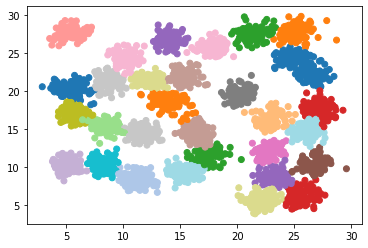




---densite_variable.arff---
k = 4
linkage = single
Temps de calcul : 0.012713434999994888
Indice de Davies-Bouldin
0.5871727117137286
Coefficient de silhouette
-0.015556392199301652


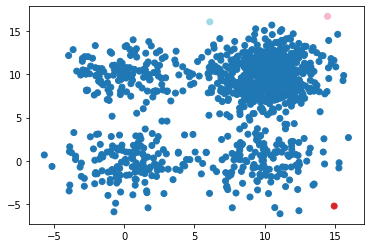




linkage = average
Temps de calcul : 0.014245686000002422
Indice de Davies-Bouldin
0.5410845560013089
Coefficient de silhouette
0.5806129867355734


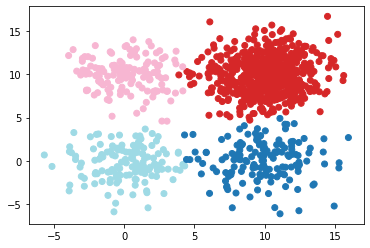




linkage = complete
Temps de calcul : 0.01471042600000061
Indice de Davies-Bouldin
0.5348844152741853
Coefficient de silhouette
0.5804785072218802


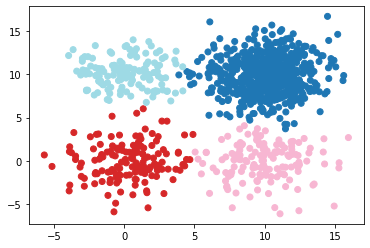




linkage = ward
Temps de calcul : 0.022369837999995923
Indice de Davies-Bouldin
0.5375702885505091
Coefficient de silhouette
0.5798059048371337


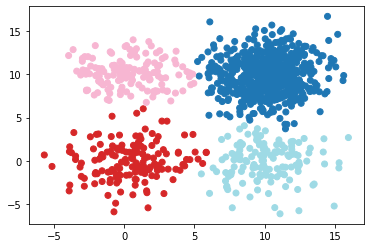




---non_convexe.arff---
k = 2
linkage = single
Temps de calcul : 0.11070950300000248
Indice de Davies-Bouldin
1.0988998676613282
Coefficient de silhouette
0.36733109590793084


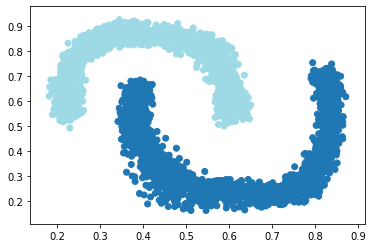




linkage = average
Temps de calcul : 0.3072900849999911
Indice de Davies-Bouldin
0.9209869683868165
Coefficient de silhouette
0.4156951084312271


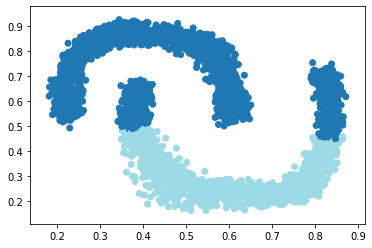




linkage = complete
Temps de calcul : 0.2680664080000099
Indice de Davies-Bouldin
0.8995143788484918
Coefficient de silhouette
0.4531755732724178


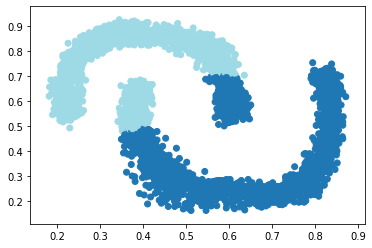




linkage = ward
Temps de calcul : 0.46249002900000846
Indice de Davies-Bouldin
0.8355847616927392
Coefficient de silhouette
0.4341592014781971


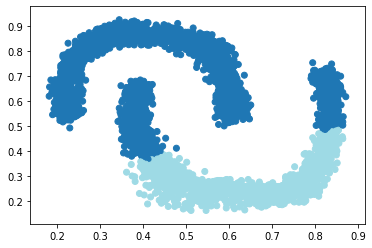

In [13]:
print("----------Clustering agglomératif----------\n")
k_list = [2, 9, 20, 30, 4, 2]

link=["single", "average", "complete", "ward"]

print("-----Nombre de clusters indiqué-----\n")

for i in range(len(list_dataset)):
    print("---" + list_dataset[i] + "---")
    
    print("k = %d"%k_list[i])
    
    dataset = arff.loadarff(open(path + list_dataset[i], 'r'))
    data = [[x[0],x[1]] for x in dataset[0]]

    for j in range(len(link)):
        print("linkage = %s"%link[j])
    
        time_start = time.process_time() # On regarde le temps CPU
    
        clust = cluster.AgglomerativeClustering(n_clusters=k_list[i], affinity='euclidean', linkage=link[j])
        y_pred = clust.fit_predict(data)
        
        time_stop = time.process_time() # On regarde le temps CPU
        
        print("Temps de calcul : " + str(time_stop-time_start))

        labels = clust.labels_
        print("Indice de Davies-Bouldin")
        print(metrics.davies_bouldin_score(data, labels))

        print("Coefficient de silhouette")
        print(metrics.silhouette_score(data, labels, metric='euclidean'))

        plt.scatter((dataset[0])['x'], (dataset[0])['y'], c=y_pred, cmap="tab20")
        plt.show()
        
        print("\n\n")

-----Nombre de clusters non indiqué : méthode itérative-----

---bruite_convexe.arff---
k attendu = 2
linkage = complete


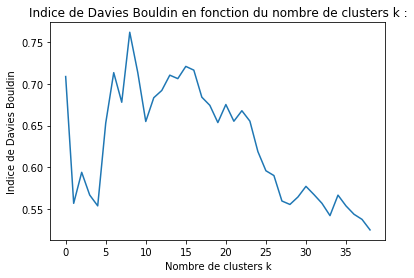

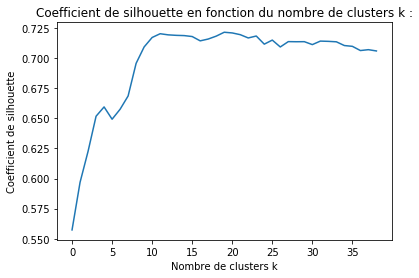

---carre.arff---
k attendu = 9
linkage = complete


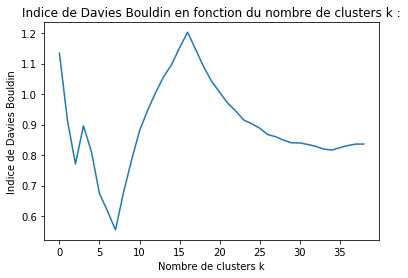

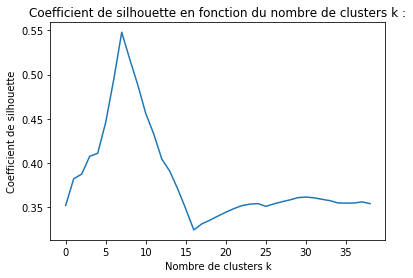

---convexe_bien_separe.arff---
k attendu = 20
linkage = ward


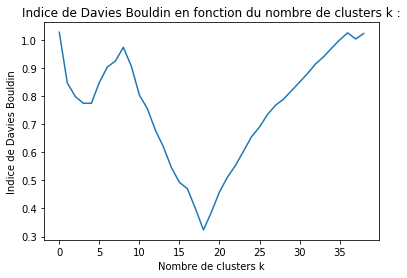

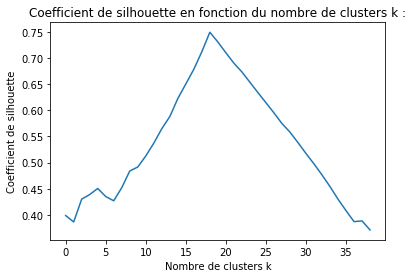

---convexe_mal_separe.arff---
k attendu = 30
linkage = ward


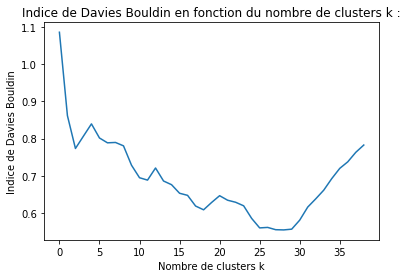

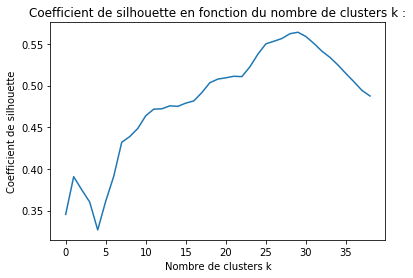

---densite_variable.arff---
k attendu = 4
linkage = ward


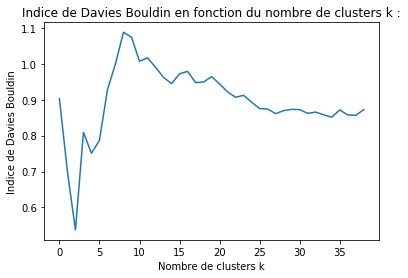

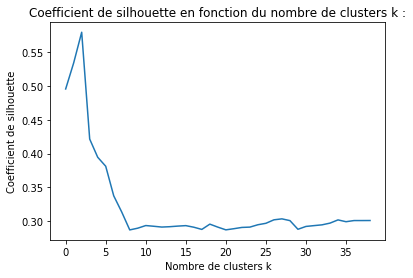

---non_convexe.arff---
k attendu = 2
linkage = single


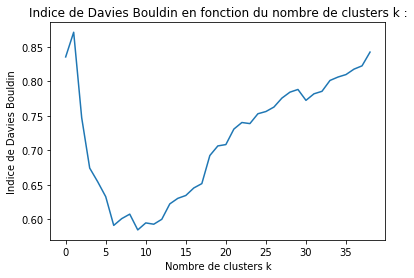

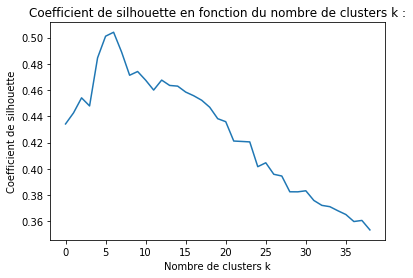

In [16]:
print("-----Nombre de clusters non indiqué : méthode itérative-----\n")

link=["complete", "complete", "ward", "ward", "ward", "single"]

for i in range(len(list_dataset)):
    print("---" + list_dataset[i] + "---")
        
    print("k attendu = %d"%k_list[i])
    print("linkage = %s"%link[i])
    
    dataset = arff.loadarff(open(path + list_dataset[i], 'r'))
    data = [[x[0],x[1]] for x in dataset[0]]

    db_score_list = []
    sil_score_list = []

    for k in range(2,41,1):

        clust = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=link[j])
        y_pred = clust.fit_predict(data)

        #print("Score")
        #print(clust.score(data))

        labels = clust.labels_
        # Indice de Davies-Bouldin"
        db_score = metrics.davies_bouldin_score(data, labels)
        db_score_list.append(db_score)

        # Coefficient de silhouette
        sil_score = metrics.silhouette_score(data, labels, metric='euclidean')
        sil_score_list.append(sil_score)

    plt.plot(range(len(db_score_list)), db_score_list)
    plt.xlabel("Nombre de clusters k")
    plt.ylabel("Indice de Davies Bouldin")
    plt.title("Indice de Davies Bouldin en fonction du nombre de clusters k :")
    plt.show()

    plt.plot(range(len(sil_score_list)), sil_score_list)
    plt.xlabel("Nombre de clusters k")
    plt.ylabel("Coefficient de silhouette")
    plt.title("Coefficient de silhouette en fonction du nombre de clusters k :")
    plt.show()